Introduction to Uber Rides Data Analysis

Why Analyze Uber Rides Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
dataset.shape


(1156, 7)

In [12]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
dataset.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [16]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [50]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')


In [52]:
dataset['START_DATE'] 

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1043   2016-12-12 13:22:00
1044   2016-12-12 13:36:00
1045   2016-12-12 14:26:00
1046   2016-12-12 17:51:00
1047   2016-12-12 20:48:00
Name: START_DATE, Length: 413, dtype: datetime64[ns]

In [40]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


In [54]:
dataset['day-night']

0           Night
1         Morning
2           Night
3         Evening
4       Afternoon
          ...    
1043    Afternoon
1044    Afternoon
1045    Afternoon
1046      Evening
1047        Night
Name: day-night, Length: 413, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

In [26]:
dataset.dropna(inplace=True)


In [28]:
dataset.drop_duplicates(inplace=True)


In [30]:
dataset.START_DATE

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1043   2016-12-12 13:22:00
1044   2016-12-12 13:36:00
1045   2016-12-12 14:26:00
1046   2016-12-12 17:51:00
1047   2016-12-12 20:48:00
Name: START_DATE, Length: 413, dtype: datetime64[ns]

In [32]:
dataset.END_DATE

0      2016-01-01 21:17:00
1      2016-01-02 01:37:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
               ...        
1043   2016-12-12 13:32:00
1044   2016-12-12 13:51:00
1045   2016-12-12 14:39:00
1046   2016-12-12 18:01:00
1047   2016-12-12 20:57:00
Name: END_DATE, Length: 413, dtype: datetime64[ns]

In [34]:
dataset.CATEGORY 	

0       Business
1       Business
2       Business
3       Business
4       Business
          ...   
1043    Business
1044    Business
1045    Business
1046    Business
1047    Business
Name: CATEGORY, Length: 413, dtype: object

In [36]:
dataset.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
date                  object
time                 float64
day-night           category
dtype: object

In [38]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


In [42]:
dataset.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'date', 'time', 'day-night'],
      dtype='object')

In [44]:
dataset['CATEGORY'].value_counts()

CATEGORY
Business    400
Personal     13
Name: count, dtype: int64

In [48]:
dataset['PURPOSE']

0        Meal/Entertain
1                   NOT
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1043    Errand/Supplies
1044     Meal/Entertain
1045     Customer Visit
1046     Meal/Entertain
1047     Customer Visit
Name: PURPOSE, Length: 413, dtype: object

Data Visualization

In [57]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

(array([  0.,  50., 100., 150., 200.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200')])

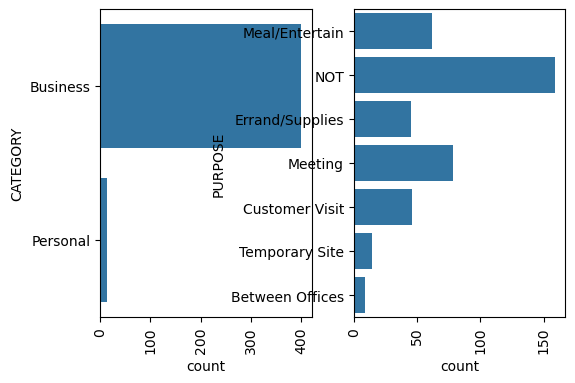

In [63]:
plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

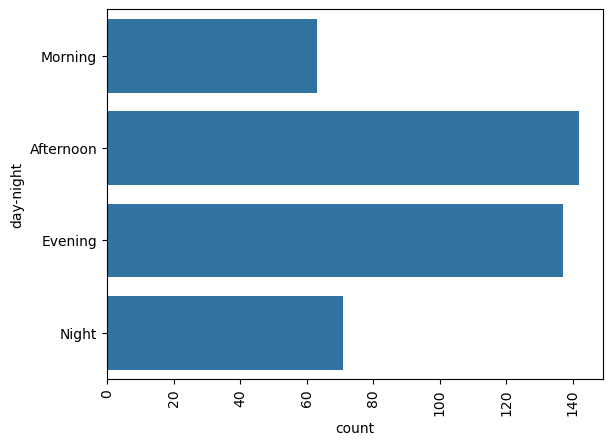

In [69]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)


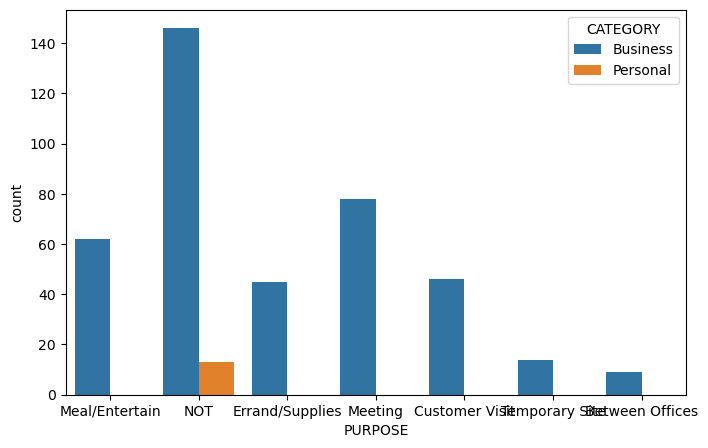

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
#plt.xticks(rotation=90)
plt.show()


Insights from the above count-plots : 
Most of the rides are booked for business purpose.
Most of the people book cabs for Meetings and Meal / Entertain purpose.
Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

<Axes: >

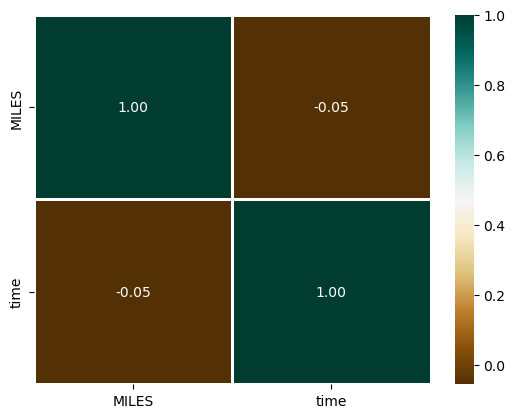

In [77]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)




Insights from the heatmap:
Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
There is not much correlation between the features.

In [86]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


In [88]:
dataset['DAY']

0        Fri
1        Sat
2        Sat
3       Tues
4        Wed
        ... 
1043     Mon
1044     Mon
1045     Mon
1046     Mon
1047     Mon
Name: DAY, Length: 413, dtype: object

Text(0, 0.5, 'COUNT')

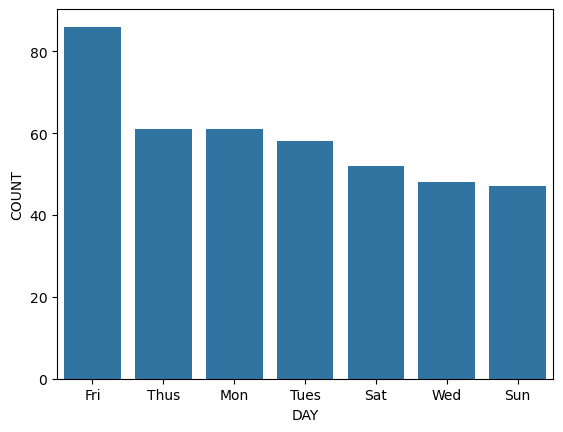

In [90]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13896\615779499.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

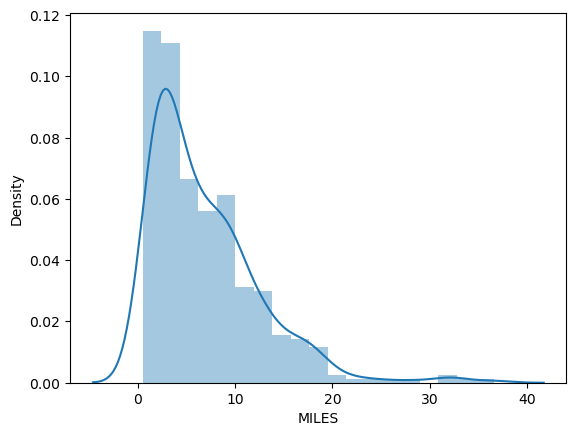

In [92]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])


INSIGHTS THIS CHART

Insights from the above plots :
Most of the cabs booked for the distance of 4-5 miles.
Majorly people chooses cabs for the distance of 0-20 miles.
For distance more than 20 miles cab counts is nearly negligible.

INSIGHTS

In short, analyzing Uber rides data using Python can provide valuable insights into several key areas:

Demand and Supply Patterns: Identify peak hours, days, and high-demand locations to optimize driver distribution and reduce wait times.
Surge Pricing: Understand when and where surge pricing occurs, and its impact on customer behavior and ride cancellations.
Driver Performance: Analyze ride duration, ratings, and driver availability to improve efficiency and driver incentives.
Geospatial Insights: Visualize hotspots and high-demand areas to optimize service coverage and operational strategies.
Customer Behavior: Study ride frequency, preferences, and cancellations to better serve different customer segments.
Revenue Insights: Break down fare structures and driver earnings to assess financial efficiency.
Forecasting: Predict future demand and pricing using time series models to improve planning and allocation.